In [111]:
# Thresholding
import cv2
from pytesseract import Output, pytesseract
import numpy as np
from imutils.object_detection import non_max_suppression
from PIL import Image
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print(tensorflow.__version__)
print(pd.__version__)

2.15.0
2.2.0


In [3]:
def display(img, cmap='gray'):
    # fig = plt.figure(figsize=(11.69,8.27)) # A4 사이즈
    fig = plt.figure(figsize=(16.53, 11.69))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [4]:
# MNIST
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [5]:
train_data.shape, test_data.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
train_labels.shape, test_labels.shape

((60000,), (10000,))

In [7]:
train_data[0].shape

(28, 28)

In [8]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
digits_data = np.vstack([train_data, test_data])
digits_labels = np.hstack([train_labels, test_labels])

In [10]:
digits_data, digits_data.shape

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [11]:
digits_labels, digits_labels.shape

(array([5, 0, 4, ..., 4, 5, 6], dtype=uint8), (70000,))

Text(0.5, 1.0, 'Class: 4')

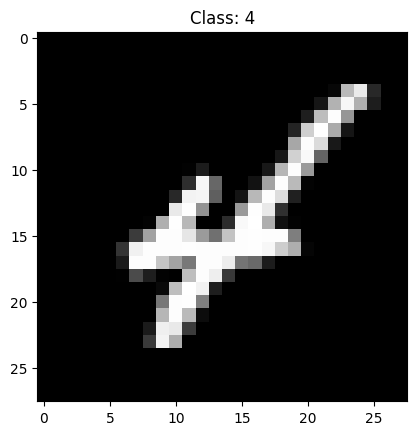

In [12]:
index = np.random.randint(0, digits_data.shape[0])
plt.imshow(digits_data[index], cmap='gray')
plt.title(f'Class: {str(digits_labels[index])}')

In [13]:
# sns.countplot(digits_labels);

In [16]:
# Kaggle A-Z
dataset_az = pd.read_csv('./OCR_with_Python/Models/A_Z Handwritten Data.csv').astype('float32')

In [17]:
dataset_az

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
alphabet_data = dataset_az.drop('0', axis=1)
alphabet_labels = dataset_az['0']

In [26]:
alphabet_data.shape, alphabet_labels.shape

((372450, 784), (372450,))

In [51]:
alphabet_data

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [28]:
alphabet_labels

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
372445    25.0
372446    25.0
372447    25.0
372448    25.0
372449    25.0
Name: 0, Length: 372450, dtype: float32

In [30]:
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))

In [54]:
alphabet_data[0].shape

(28, 28)

In [31]:
alphabet_data.shape

(372450, 28, 28)

Text(0.5, 1.0, 'Class: 18.0')

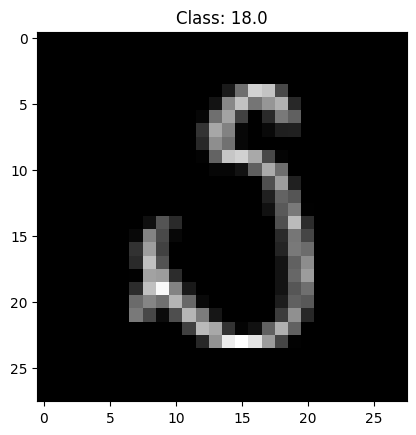

In [50]:
index = np.random.randint(0, alphabet_data.shape[0])
plt.imshow(alphabet_data[index], cmap='gray')
plt.title(f'Class: {str(alphabet_labels[index])}')

In [55]:
# Joining the datasets
digits_labels, np.unique(digits_labels)

(array([5, 0, 4, ..., 4, 5, 6], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [56]:
alphabet_labels, np.unique(alphabet_labels)

(0          0.0
 1          0.0
 2          0.0
 3          0.0
 4          0.0
           ... 
 372445    25.0
 372446    25.0
 372447    25.0
 372448    25.0
 372449    25.0
 Name: 0, Length: 372450, dtype: float32,
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
       dtype=float32))

In [57]:
alphabet_labels += 10 # 숫자와 합치기 위해 10만큼 이동함.
alphabet_labels, np.unique(alphabet_labels)

(0         10.0
 1         10.0
 2         10.0
 3         10.0
 4         10.0
           ... 
 372445    35.0
 372446    35.0
 372447    35.0
 372448    35.0
 372449    35.0
 Name: 0, Length: 372450, dtype: float32,
 array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
        23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
       dtype=float32))

In [76]:
data = np.vstack([alphabet_data, digits_data]) # 데이터는 백터값이므로 세로방향으로 합침.(Stack함)
labels = np.hstack([alphabet_labels, digits_labels]) # digits_labels에 가로방향으로 alphabet_labels를 합침(Stack함)

In [77]:
data.shape, labels.shape

((442450, 28, 28), (442450,))

In [78]:
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [79]:
data

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [80]:
data = np.array(data, dtype='float32')

In [81]:
data.shape

(442450, 28, 28)

In [82]:
data

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [83]:
data = np.expand_dims(data, axis=-1)

In [84]:
data.shape

(442450, 28, 28, 1)

In [85]:
# [ 442450개
#     [ 28개
#         [ 28개
#             [] 1개
#         ]
#     ]
# ]

In [86]:
# Pre-processing the data

data[0].min(), data[0].max()

(0.0, 255.0)

In [87]:
data /= 255.0

data[0].min(), data[0].max()

(0.0, 1.0)

In [88]:
np.unique(labels), len(np.unique(labels)) # softmax

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32),
 36)

In [89]:
labels

array([10., 10., 10., ...,  4.,  5.,  6.], dtype=float32)

In [91]:
le = LabelBinarizer()
labels = le.fit_transform(labels) # 중복제거 후 labels의 개수만큼 0과 1로 채움 예)ABC012 => 100000(A), 010000(B), 001000(C) ...
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [92]:
np.unique(labels)

array([0, 1], dtype=int32)

In [93]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [94]:
labels[0], len(labels[0])

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32),
 36)

In [96]:
labels[3000], labels[3000].shape

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32),
 (36,))

In [97]:
# OneHotEncoder
# A, B, C
# 0, 1, 2

# A, B, C
# 1, 0, 0
# 0, 1, 0
# 0, 0, 1

Text(0.5, 1.0, 'Class: [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

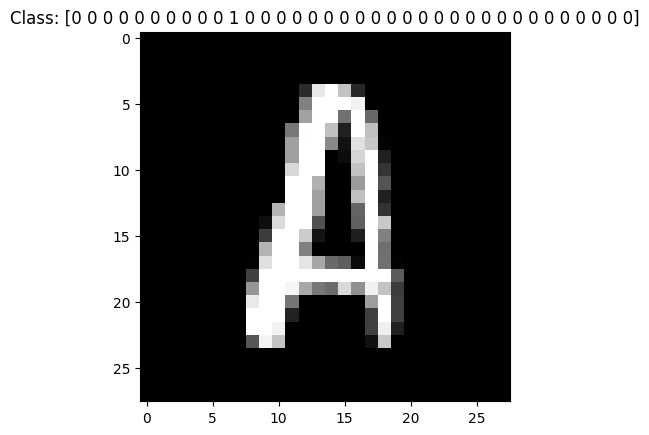

In [102]:
# index = np.random.randint(0, data.shape[0])
plt.imshow(data[37].reshape(28,28), cmap='gray')
plt.title(f'Class: {str(labels[37])}')

In [103]:
labels


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [104]:
classes_total = labels.sum(axis = 0) # 각 문자의 개수를 모두 더함.
classes_total   # 알파벳 O가 트레이닝 개수가 가장 많음.

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076],
      dtype=int32)

In [105]:
classes_total.max()

57825

In [107]:
classes_weight = {}
for i in range(0, len(classes_total)):
    # print(i)
    classes_weight[i] = classes_total.max() / classes_total[i]
classes_weight

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

In [108]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=1, stratify=labels)
x_train.shape, x_test.shape

((353960, 28, 28, 1), (88490, 28, 28, 1))

In [109]:
y_train.shape, y_test.shape

((353960, 36), (88490, 36))

In [112]:
augumentation = ImageDataGenerator(rotation_range=10, zoom_range=0.05, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=False)

In [115]:
# Building the neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [119]:
network = Sequential()

network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')) # same: 검색 할 때 모자라면 0으로 채움
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')) # same: 검색 할 때 모자라면 0으로 채움
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())

# Dense Layer
network.add(Dense(64, activation='relu'))
network.add(Dense(128, activation='relu'))

network.add(Dense(36, activation='softmax'))

network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [120]:
network.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 6, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 3, 3, 128)        

In [121]:
name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]
name_labels

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [122]:
# Trainnig the neural network
file_model = 'custom_ocr.model'

# 전체 dataset을 20번 반복하여 학습한다
epochs = 20
# batch: dataset을 작은 그룹, batch_size: batch의 개수
batch_size = 128
# 예) 이미지 50장을 학습시킨다고 할때, 50장을 한번에 학습시키기엔 너무 많아 10장씩 5번 학습시켰다고 했을 때. 이미지 1장은 1 batch
# batch_size = 10, iteration = 5, batch_size * iteration = 1 epochs, (batch_size*iteration)*20 = 20 epochs

In [123]:
checkpointer = ModelCheckpoint(file_model, monitor='val_loss', verbose=1, save_best_only=True)

In [125]:
len(x_train), batch_size, len(x_train) // batch_size

(353960, 128, 2765)

In [128]:
history = network.fit(
    augumentation.flow(x_train, y_train, batch_size=batch_size),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // batch_size,
    epochs=epochs,
    class_weight=classes_weight,
    verbose=1,
    callbacks=[checkpointer]
)

Epoch 1/20


2764/2765 [============================>.] - ETA: 0s - loss: 2.0120 - accuracy: 0.8349
Epoch 1: val_loss improved from inf to 0.22637, saving model to custom_ocr.modal
INFO:tensorflow:Assets written to: custom_ocr.modal\assets


INFO:tensorflow:Assets written to: custom_ocr.modal\assets


2765/2765 [==============================] - 240s 85ms/step - loss: 2.0115 - accuracy: 0.8349 - val_loss: 0.2264 - val_accuracy: 0.9187
Epoch 2/20
2765/2765 [==============================] - ETA: 0s - loss: 0.9287 - accuracy: 0.9038
Epoch 2: val_loss did not improve from 0.22637
2765/2765 [==============================] - 210s 76ms/step - loss: 0.9287 - accuracy: 0.9038 - val_loss: 0.3081 - val_accuracy: 0.8704
Epoch 3/20
2765/2765 [==============================] - ETA: 0s - loss: 0.7903 - accuracy: 0.9145
Epoch 3: val_loss improved from 0.22637 to 0.17934, saving model to custom_ocr.modal
INFO:tensorflow:Assets written to: custom_ocr.modal\assets


INFO:tensorflow:Assets written to: custom_ocr.modal\assets


2765/2765 [==============================] - 170s 62ms/step - loss: 0.7903 - accuracy: 0.9145 - val_loss: 0.1793 - val_accuracy: 0.9362
Epoch 4/20
2764/2765 [============================>.] - ETA: 0s - loss: 0.6967 - accuracy: 0.9216
Epoch 4: val_loss did not improve from 0.17934
2765/2765 [==============================] - 161s 58ms/step - loss: 0.6969 - accuracy: 0.9216 - val_loss: 0.2535 - val_accuracy: 0.8893
Epoch 5/20
2765/2765 [==============================] - ETA: 0s - loss: 0.6497 - accuracy: 0.9267
Epoch 5: val_loss did not improve from 0.17934
2765/2765 [==============================] - 173s 62ms/step - loss: 0.6497 - accuracy: 0.9267 - val_loss: 0.2596 - val_accuracy: 0.8880
Epoch 6/20
2764/2765 [============================>.] - ETA: 0s - loss: 0.5944 - accuracy: 0.9317
Epoch 6: val_loss did not improve from 0.17934
2765/2765 [==============================] - 207s 75ms/step - loss: 0.5946 - accuracy: 0.9317 - val_loss: 0.1944 - val_accuracy: 0.9205
Epoch 7/20
2765/2765 

KeyboardInterrupt: 